<a href="https://colab.research.google.com/github/VladKast/Learning_seminar_1st_project_PYTHON/blob/main/Learning_seminar_1st_project_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict diamond price using the basic
diamond properties. Price columns are used as labels (outupts). ¨

Dataset is splited into trainig and validation subset. Goal is to reach minimum cost value and prevent over-fitting.

Dataset for the task: https://drive.google.com/file/d/1fQrHqZ1vziaWPln-HVbBGGYIlKPoIf_r/view


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from google.colab import files
import io
from math import sqrt

import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

data = files.upload()  # Upload file diamonds.csv from computer




Saving diamonds.csv to diamonds.csv


In [ ]:
# Data
data = pd.read_csv(io.StringIO(data['diamonds.csv'].decode('utf-8')))

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape

(53940, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# first column is just index so I will remove it
data = data.drop(["Unnamed: 0"], axis = 1)


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# zeroes in the row "min" indicates incorect data in column x, y, and z so I will remove it (x,y,z rempresents dimenision)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Column cut, color and clarity - needs to be handled
cut_OE = OrdinalEncoder(categories=[['Ideal','Premium','Good','Very Good', 'Fair'], 
                                    ['E','I', 'J', 'H','F', 'G', 'D'],
                                    ['SI2','SI1','VS1','VS2','WS2','WS1','I1','IF']])


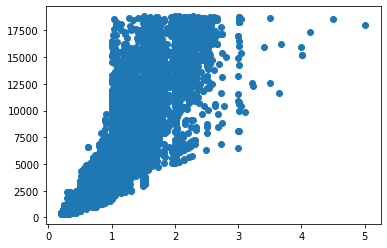

In [ ]:
plt.scatter(x=data.carat, y=data.price)

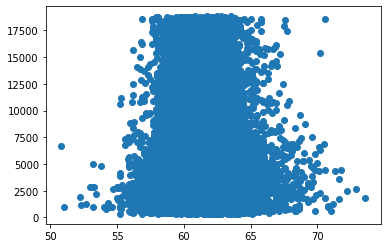

In [ ]:
plt.scatter(x=data.depth, y=data.price)

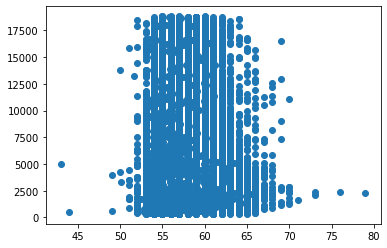

In [ ]:
plt.scatter(x=data.table, y=data.price)

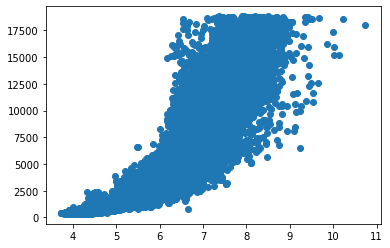

In [ ]:
plt.scatter(x=data.x, y=data.price)

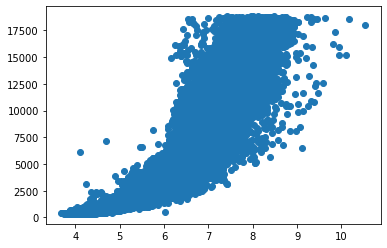

In [ ]:
plt.scatter(x=data.y, y=data.price)

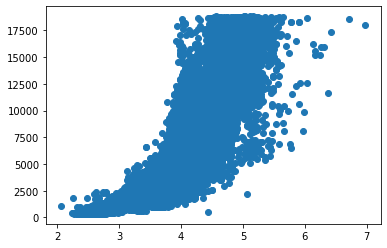

In [ ]:
plt.scatter(x=data.z, y=data.price)

In [ ]:
# we need to drop outliers, which would affect the outcome of our regression model
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

In [ ]:
data_for_training = data.copy()  # data copy


# Bulding Neural Network

In [ ]:
print(cut_OE)

OrdinalEncoder(categories=[['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],
                           ['E', 'I', 'J', 'H', 'F', 'G', 'D'],
                           ['SI2', 'SI1', 'VS1', 'VS2', 'WS2', 'WS1', 'I1',
                            'IF']])


In [ ]:
y = data['price']
X = data.drop('price', axis=1)

In [ ]:
# encode non numerical values to the numerical ones
encoder = LabelEncoder()

X['cut'] = encoder.fit_transform(X['cut'])
cut_mappings = {index: label for index, label in enumerate(encoder.classes_)}

X['color'] = encoder.fit_transform(X['color'])
color_mappings = {index: label for index, label in enumerate(encoder.classes_)}

X['clarity'] = encoder.fit_transform(X['clarity'])
clarity_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [ ]:
print(cut_mappings)
print(color_mappings)
print(clarity_mappings)

{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}
{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
{0: 'I1', 1: 'IF', 2: 'SI1', 3: 'SI2', 4: 'VS1', 5: 'VS2', 6: 'VVS1', 7: 'VVS2'}


In [ ]:
print(X)


       Unnamed: 0  carat  cut  color  clarity  depth  table     x     y     z
0               1   0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1               2   0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2               3   0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3               4   0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4               5   0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...           ...    ...  ...    ...      ...    ...    ...   ...   ...   ...
53935       53936   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936       53937   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937       53938   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938       53939   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939       53940   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53907 rows x 10 columns]


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# data formalization
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.006237,0.50,0.166667,0.428571,0.469298,0.333333,0.031384,0.043732,0.075203
1,0.000019,0.002079,0.75,0.166667,0.285714,0.394737,0.500000,0.022825,0.023324,0.050813
2,0.000037,0.006237,0.25,0.166667,0.571429,0.267544,0.611111,0.045649,0.056851,0.050813
3,0.000056,0.018711,0.75,0.833333,0.714286,0.508772,0.416667,0.067047,0.080175,0.115854
4,0.000074,0.022869,0.25,1.000000,0.428571,0.548246,0.416667,0.087019,0.097668,0.140244
...,...,...,...,...,...,...,...,...,...,...
53902,0.999926,0.108108,0.50,0.000000,0.285714,0.438596,0.388889,0.288160,0.303207,0.292683
53903,0.999944,0.108108,0.25,0.000000,0.285714,0.539474,0.333333,0.279601,0.301749,0.315041
53904,0.999963,0.103950,1.00,0.000000,0.285714,0.526316,0.472222,0.275321,0.291545,0.304878
53905,0.999981,0.137214,0.75,0.666667,0.428571,0.447368,0.416667,0.345221,0.355685,0.341463


In [ ]:
# Data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
print(len(X_train))
print(len(X_test))

45820
8087


In [ ]:
# 1. Create a model 
model = tf.keras.Sequential([                             
                             tf.keras.layers.Dense(30, activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),                              
                             tf.keras.layers.Dense(1, activation='relu')
                             ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mse, 
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),  
              metrics=["mae"]) 

# 3. Fit the model
model.fit(X_train,y_train, epochs=60)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
1432/1432 [==============================] - 5s 3ms/step - loss: 31306650.0000 - mae: 3928.2393
Epoch 2/60
1432/1432 [==============================] - 4s 3ms/step - loss: 30983064.0000 - mae: 3890.4968
Epoch 3/60
1432/1432 [==============================] - 3s 2ms/step - loss: 30085060.0000 - mae: 3783.3784
Epoch 4/60
1432/1432 [==============================] - 3s 2ms/step - loss: 28521396.0000 - mae: 3589.9954
Epoch 5/60
1432/1432 [==============================] - 3s 2ms/step - loss: 26359014.0000 - mae: 3318.7803
Epoch 6/60
1432/1432 [==============================] - 3s 2ms/step - loss: 23720012.0000 - mae: 3036.5771
Epoch 7/60
1432/1432 [==============================] - 3s 2ms/step - loss: 20830280.0000 - mae: 2826.9238
Epoch 8/60
1432/1432 [==============================] - 3s 2ms/step - loss: 18015116.0000 - mae: 2698.8237
Epoch 9/60
1432/1432 [==============================] - 3s 2ms/step - loss: 15650372.0000 - mae: 2666.7346
Epoch 10/60
1432/1432 [==============

In [ ]:
train = model.predict(X_train)
print(mean_absolute_error(y_train,train))

pred = model.predict(X_test)
print(mean_absolute_error(y_test,pred))

1432/1432 [==============================] - 2s 1ms/step
957.5693801977499
253/253 [==============================] - 0s 2ms/step
961.062322041566
